# Cas pratique analyse des sentiments

- En repartant de la table `df_sms_clean`, calculez les niveaux de subjectivité et de positivité des textos analysés et stockez ces informations dans deux nouvelles variables de la table.  
- Représentez graphiquement la répartition des textos en fonction de leur subjectivité et de leur subjectivité. Faites apparaître dans une couleur différente les spams. Pourrait-on utiliser ces 2 variables pour repérer les spams selon vous?   
- Faites apparaître les textos les plus positifs/les textos les plus négatifs/les textos les plus subjectifs/les plus objectifs pour vérifier que la mesure fonctionne correctement.   

_Bonus_ : On s'intéresse maintenant aux spam :  
- En reprenant notre modèle de prédiction de spams, déterminez si la probabilité qu'on repère un spam comme tel dépend ou non du degré de subjectivité et de positivité de son contenu.  
(Démarche à suivre : reprendre le vecteur de probabilités d'être un spam pour les spams de y_test et représenter ces points en fonction de la positivité et de la subjectivité en colorant selon ce vecteur).  


In [11]:
import pandas as pd

In [12]:
import pickle
#on charge les pickles ainsi sauvegardés(deja dataframe)

with open('dataSMScleanIvana.pkl', 'rb') as dataIvana:
    dataSMScleanIvana = pickle.load(dataIvana)

In [40]:
dataSMScleanIvana.labels.value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

## Analyse de sentiments  

Sur Python, le module textblob a été développé avec des linguistes qui ont manuellement noté le degré de subjectivité et de positivité de chacun des termes de la langue anglaise. Les deux objets sont :  
- TextBlob(x).sentiment.subjectivity qui note de 0 à 1 le degré de subjectivité (1 = très subjectif).  
- TextBlob(x).sentiment.polarity qui note de -1 à 1 le degré de positivité (1 = très positif).   
On peut calculer cela sur un ensemble de chaînes de caractère comme la moyenne de ces degrés pour chacun des termes de la chaîne de caractère. Concrètement on peut donc ajouter deux variables à notre dataframe : 

In [15]:
from textblob import TextBlob

pos = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

dataSMScleanIvana['positivite'] = dataSMScleanIvana.texte.apply(pos)
dataSMScleanIvana['subjectivite'] = dataSMScleanIvana.texte.apply(sub)
[["positivite", "subjectivite"]]

,positivite,subjectivite
0,0.150000,0.762500
1,0.500000,0.500000
2,0.300000,0.550000
3,0.100000,0.300000
4,0.000000,0.000000
...,...,...
5567,0.180556,0.611111
5568,0.000000,0.000000
5569,-0.112500,0.287500
5570,0.216667,0.433333


In [16]:
dataSMScleanIvana

,labels,texte,positivite,subjectivite
0,ham,"go until jurong point, crazy.. available only ...",0.150000,0.762500
1,ham,ok lar... joking wif u oni...,0.500000,0.500000
2,spam,free entry in 2 a wkly comp to win fa cup fina...,0.300000,0.550000
3,ham,u dun say so early hor... u c already then say...,0.100000,0.300000
4,ham,"nah i don't think he goes to usf, he lives aro...",0.000000,0.000000
...,...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...,0.180556,0.611111
5568,ham,will ü b going to esplanade fr home?,0.000000,0.000000
5569,ham,"pity, * was in mood for that. so...any other s...",-0.112500,0.287500
5570,ham,the guy did some bitching but i acted like i'd...,0.216667,0.433333


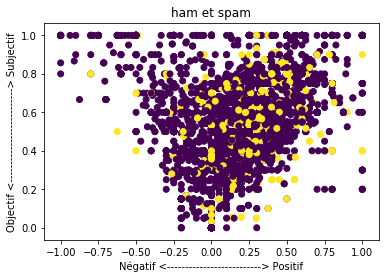

In [44]:
import matplotlib.pyplot as plt
plt.scatter(dataSMScleanIvana['positivite'], dataSMScleanIvana['subjectivite'], c = dataSMScleanIvana.labels == "spam")  
plt.title("ham et spam")
plt.xlabel("Négatif <--------------------------> Positif")
plt.ylabel("Objectif <--------------------------> Subjectif")
plt.show()

In [34]:
dataHam = dataSMScleanIvana[dataSMScleanIvana.labels == "ham"]
#dataHam 

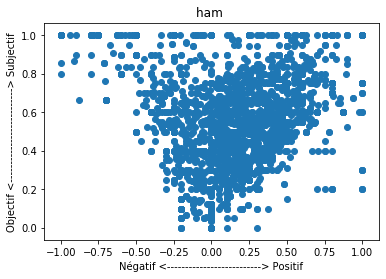

In [35]:
import matplotlib.pyplot as plt
plt.scatter(dataHam['positivite'], dataHam['subjectivite'])  
plt.title("ham ")
plt.xlabel("Négatif <--------------------------> Positif")
plt.ylabel("Objectif <--------------------------> Subjectif")
plt.show()

In [33]:
dataSpam = dataSMScleanIvana[dataSMScleanIvana.labels == "spam"]


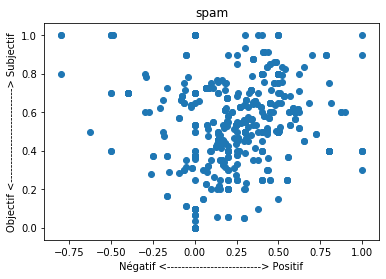

In [36]:
import matplotlib.pyplot as plt
plt.scatter(dataSpam['positivite'], dataSpam['subjectivite'])  
plt.title("spam")
plt.xlabel("Négatif <--------------------------> Positif")
plt.ylabel("Objectif <--------------------------> Subjectif")
plt.show()

In [50]:
dataSMScleanIvana.positivite.sort_values(ascending=False)[0:10]

4392    1.0
596     1.0
4267    1.0
3229    1.0
5327    1.0
875     1.0
3212    1.0
5161    1.0
1826    1.0
720     1.0
Name: positivite, dtype: float64

In [52]:
# Les 7 texto les plus positive
dataSMScleanIvana.sort_values(by='positivite', ascending = False).head(7)

,labels,texte,positivite,subjectivite
3136,ham,wat makes some people dearer is not just de ha...,1.0,0.2
4408,ham,"awesome, plan to get here any time after like ...",1.0,1.0
907,spam,"all the lastest from stereophonics, marley, di...",1.0,0.4
1826,ham,wat makes some people dearer is not just de ha...,1.0,0.2
4392,ham,the greatest test of courage on earth is to be...,1.0,1.0
3898,ham,no. thank you. you've been wonderful,1.0,1.0
3422,spam,welcome! please reply with your age and gender...,1.0,0.9


In [56]:
# Les 7 texto les plus negative
dataSMScleanIvana.sort_values(by='positivite', ascending = True).head(7)

,labels,texte,positivite,subjectivite
1248,ham,horrible gal. me in sch doing some stuff. how ...,-1.0,1.000000
1534,ham,horrible bf... i now v hungry...,-1.0,1.000000
2676,ham,i'm sick !! i'm needy !! i want you !! *pouts*...,-1.0,0.857143
3015,ham,i might go 2 sch. yar at e salon now v boring.,-1.0,1.000000
1266,ham,im in inperialmusic listening2the weirdest tra...,-1.0,1.000000
2539,ham,the monthly amount is not that terrible and yo...,-1.0,1.000000
5561,ham,get me out of this dump heap. my mom decided t...,-1.0,1.000000


In [57]:
# Les 7 texto les plus subjectif
dataSMScleanIvana.sort_values(by='subjectivite', ascending = False).head(7)

,labels,texte,positivite,subjectivite
1673,spam,urgent! we are trying to contact u. todays dra...,0.0,1.0
597,ham,gud mrng dear have a nice day,0.6,1.0
2178,ham,oh k :)why you got job then whats up?,0.5,1.0
2155,ham,oh god i am happy to see your message after 3 ...,0.8,1.0
594,ham,you still at grand prix?,0.5,1.0
3835,ham,watching tv lor. nice one then i like lor.,0.6,1.0
3844,ham,yes ammae....life takes lot of turns you can o...,0.0,1.0


In [58]:
# Les 7 texto les plus objectif
dataSMScleanIvana.sort_values(by='subjectivite', ascending = True).head(7)

,labels,texte,positivite,subjectivite
2785,ham,"k, wat s tht incident?",0.0,0.0
2529,ham,jay says he'll put in &lt;#&gt;,0.0,0.0
2531,ham,so the sun is anti sleep medicine.,0.0,0.0
2532,ham,what's happening with you. have you gotten a j...,0.0,0.0
2537,ham,you do what all you like,0.0,0.0
2538,ham,that's y we haf to combine n c how lor...,0.0,0.0
5165,ham,ü still got lessons? ü in sch?,0.0,0.0
